# 1. <a id='Introduction'>Introduction 🃏 </a>

![Games](https://gamingbolt.com/wp-content/uploads/2018/05/ps4-xbox-switch.jpg)

### The gaming market is already the most profitable entertainment sector in the world, generated more than USS 120 billion worldwide in the last year of 2019.Of course, exploring the data of game sales allows us to know which games are best sold, which are the biggest developer companies, the biggest markets ect. In this way, this exploration provides us with the necessary tools to analyze data from different types of markets. With the data cleaning treatment and subsequent analysis, we can apply some data science tools to make some predictions. One of the most important predictions is prediction of future prices based on current data. Data analysis for this notebook will be based on the "video-games-sales-2019" dataset. We will start our work by cleaning the data and then plot some graphs that will show us the behavior of that data. Finally, we will use a deep learning model to forecast global game sales. 

# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [1]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
!pip install chart_studio
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import plotly.express as px
from plotly.offline import iplot

import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
%matplotlib inline

warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from colorama import Fore, Back, Style 

# Import encoder library
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 

# Imoport tensorflow libraries
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam

/kaggle/input/video-games-sales-2019/vgsales-12-4-2019.csv
/kaggle/input/video-games-sales-2019/vgsales-12-4-2019-short.csv
     |████████████████████████████████| 64 kB 607 kB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# 3. <a id='reading'>Reading the dataset.csv 📚</a>

### Starting loading dataset  CSV

In [2]:
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
data = pd.read_csv("../input/video-games-sales-2019/vgsales-12-4-2019.csv")
print(Fore.YELLOW + ' Data shape: ',Style.RESET_ALL,data.shape)
data.head()

 Data shape:   (55792, 23)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


# 4. <a id='basic'>Basic Data Exploration 🏕️</a> 

### The .info command shows the general information of the dataset

In [4]:
print(Fore.BLUE + 'Data Set !!',Style.RESET_ALL)
data.info()

Data Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54

### We replace the missing data by 0 in our dataset with .fillna(0) command.

In [5]:
df = data.fillna(0)

In [6]:
# Reading the dataset again we see that missing values were replace
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,0.0,7.7,...,0.0,0.0,0.0,0.0,2006.0,0,http://www.vgchartz.com/game/2667/wii-sports/?...,1,0.0,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,0,NES,Nintendo,Nintendo EAD,0.0,10.0,...,0.0,0.0,0.0,0.0,1985.0,0,http://www.vgchartz.com/game/6455/super-mario-...,1,0.0,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,0.0,8.2,...,0.0,0.0,0.0,0.0,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,0,PC,PUBG Corporation,PUBG Corporation,0.0,0.0,...,0.0,0.0,0.0,0.0,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,0.0,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,0.0,8.0,...,0.0,0.0,0.0,0.0,2009.0,0,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [41]:
print(Fore.BLUE + 'Data Set !!',Style.RESET_ALL)
df.info()

Data Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     55792 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55792 non-null  object 
 8   VGChartz_Score  55792 non-null  float64
 9   Critic_Score    55792 non-null  float64
 10  User_Score      55792 non-null  float64
 11  Total_Shipped   55792 non-null  float64
 12  Global_Sales    55792 non-null  float64
 13  NA_Sales        55792 non-null  float64
 14  PAL_Sales       55792 non-null  float64
 15  JP_Sales        55792 non-null  float64
 16  Other_Sales     55792 non-null  float64
 17  Year            55

### No more missing values in all columns 

### The .value_counts () command lets us know how often certain titles are repeated.

In [7]:
# The game name most often in dataset
df['Name'].value_counts()

Plants vs. Zombies                             20
Monopoly                                       15
Double Dragon                                  14
Samurai Shodown                                13
Elite                                          12
                                               ..
Secret Of Magia                                 1
Mind Quiz: Your Brain Coach                     1
Dizzel                                          1
Sega Ages 2500 Series Vol. 4: Space Harrier     1
Make It Rain: The Love of Money                 1
Name: Name, Length: 37102, dtype: int64

In [8]:
df['Genre'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Genre column in the unity Set')

### In this first plot we see the distribution of the amount of game genres, being that games with mixed themes are the most often, followed by action and adventure themes.

In [9]:
# Showing the most frequent gaming platforms in dataset
df['Platform'].value_counts().head(10)

PC      10978
PS2      3564
DS       3292
PS       2703
XBL      2115
PSN      2004
PS3      1870
PSP      1804
PS4      1755
X360     1701
Name: Platform, dtype: int64

In [10]:
# Selecting the main game platforms
x1 = df['Platform'][df['Platform']=='PC']
x2 = df['Platform'][df['Platform']=='PS2']
x3 = df['Platform'][df['Platform']=='DS']
x4 = df['Platform'][df['Platform']=='PS']
x5 = df['Platform'][df['Platform']=='XBL']
x6 = df['Platform'][df['Platform']=='PSN']
x7 = df['Platform'][df['Platform']=='PS3']
x8 = df['Platform'][df['Platform']=='PSP']
x9 = df['Platform'][df['Platform']=='PS4']
x10 = df['Platform'][df['Platform']=='X360']
total =pd.concat([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
total.value_counts().head()

PC     10978
PS2     3564
DS      3292
PS      2703
XBL     2115
Name: Platform, dtype: int64

In [11]:
total.value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the platform column in the unity set')

### We observed the distribution of the quantity of the ten most used game platforms, clearly that PC predominates.

In [12]:
df['Publisher'].value_counts().head(10)

Unknown                        4891
Sega                           2085
Activision                     1519
Ubisoft                        1519
Electronic Arts                1498
Konami                         1495
Sony Computer Entertainment    1354
Nintendo                       1351
Microsoft                      1267
THQ                            1065
Name: Publisher, dtype: int64

In [13]:
# Selecting the main game publisher 
x1 = df['Publisher'][df['Publisher']=='Unknown']
x2 = df['Publisher'][df['Publisher']=='Sega']
x3 = df['Publisher'][df['Publisher']=='Activision']
x4 = df['Publisher'][df['Publisher']=='Ubisoft']
x5 = df['Publisher'][df['Publisher']=='Electronic Arts']
x6 = df['Publisher'][df['Publisher']=='Konami']
x7 = df['Publisher'][df['Publisher']=='Sony Computer Entertainment']
x8 = df['Publisher'][df['Publisher']=='Nintendo']
x9 = df['Publisher'][df['Publisher']=='Microsoft']
x10 = df['Publisher'][df['Publisher']=='THQ']
total =pd.concat([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
total.value_counts().head()

Unknown            4891
Sega               2085
Ubisoft            1519
Activision         1519
Electronic Arts    1498
Name: Publisher, dtype: int64

In [14]:
total.value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the publisher column in the unity set')

### As we watch the destruction of the ten largest companies that publish games, we see that unknown game companies together are the ones that most often publish new titles, followed by Sega and UBisoft

### It’s convenient to eliminate some unnecessary columns to make our analysis easier

In [15]:
# Selecting useless columns
dff = df.drop(columns = ['basename','VGChartz_Score','status', 'Last_Update', 'url', 'img_url','ESRB_Rating', 'Developer'], axis = 1)

### The .describe () function provides us with a statistical analysis of all columns with numeric values.

In [16]:
dff.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
count,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000,55792.000000
mean,27896.500000,0.845082,0.049557,0.061801,0.127191,0.064026,0.036703,0.013937,0.012441,1970.465156,0.106347
std,16105.907446,2.372713,0.646783,0.830048,0.521327,0.273211,0.205018,0.075160,0.071210,263.473461,0.897682
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13948.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000
50%,27896.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000
75%,41844.250000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,9.600000


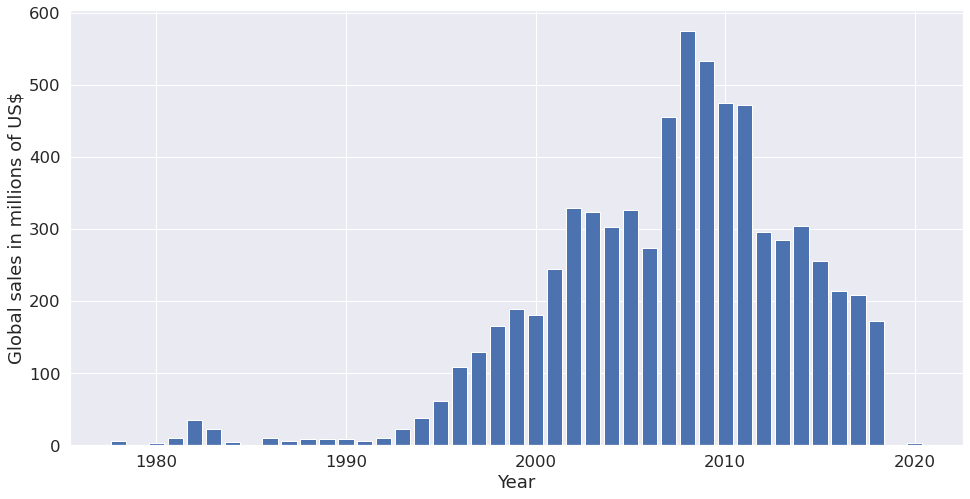

In [45]:

x = df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(16,8))
plt.bar(x.index,x)
plt.xlabel('Year')
plt.ylabel('Global sales in millions of US$')
plt.show()


## What are the most popular games, platforms, genres and publishers?

In [18]:
regionals = ['NA_Sales', 'JP_Sales', 'PAL_Sales', 'Other_Sales']
aspects = ['Name','Platform','Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = dff.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        display(k)

Name
Grand Theft Auto V    26.19
Name: NA_Sales, dtype: float64

Platform
X360    547.65
Name: NA_Sales, dtype: float64

Genre
Sports    627.97
Name: NA_Sales, dtype: float64

Publisher
Activision    428.29
Name: NA_Sales, dtype: float64

Name
Hot Shots Golf    4.26
Name: JP_Sales, dtype: float64

Platform
PS2    104.9
Name: JP_Sales, dtype: float64

Genre
Role-Playing    162.78
Name: JP_Sales, dtype: float64

Publisher
Konami    82.66
Name: JP_Sales, dtype: float64

Name
Grand Theft Auto V    28.14
Name: PAL_Sales, dtype: float64

Platform
PS3    324.72
Name: PAL_Sales, dtype: float64

Genre
Action    367.02
Name: PAL_Sales, dtype: float64

Publisher
Electronic Arts    243.68
Name: PAL_Sales, dtype: float64

Name
Grand Theft Auto V    8.32
Name: Other_Sales, dtype: float64

Platform
PS2    162.73
Name: Other_Sales, dtype: float64

Genre
Sports    131.98
Name: Other_Sales, dtype: float64

Publisher
Activision    77.64
Name: Other_Sales, dtype: float64

### **In North America:**

 * Grand Theft Auto V

 * X360

 * Esportes

 * Activision

### **In Japan**
* Hot Shots Golf   

* PS2

* Role-Playing

* Konami

### **In Europe**
* Grand Theft Auto V    

* PS3

* Ação

* Eletronics Arts

### **Others places**
* Grand Theft Auto V 

* PS2

* Esportes

* Activision


## What are the most popular games in each region (North America, Europe, Japan or others)?

In [19]:
for i in regionals:
    display(dff.sort_values(by=[i], ascending=False).head(3))

,Rank,Name,Genre,Platform,Publisher,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
41,42,Call of Duty: Black Ops,Shooter,X360,Activision,8.8,0.0,0.0,14.74,9.76,3.73,0.11,1.14,2010.0,0.0
40,41,Call of Duty: Modern Warfare 3,Shooter,X360,Activision,8.7,0.0,0.0,14.82,9.07,4.29,0.13,1.33,2011.0,0.0
32,33,Grand Theft Auto V,Action,X360,Rockstar Games,0.0,0.0,0.0,15.86,9.06,5.33,0.06,1.42,2013.0,0.0


,Rank,Name,Genre,Platform,Publisher,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
582,583,Yokai Watch 2: Psychic Specters,Role-Playing,3DS,Nintendo,0.0,0.0,0.0,2.95,0.12,0.12,2.69,0.02,2017.0,0.0
897,898,Yu-Gi-Oh: Duel Monsters 4,Role-Playing,GB,Konami,0.0,0.0,0.0,2.18,0.00,0.00,2.17,0.01,2000.0,0.0
284,285,Monster Hunter: World,Action,PS4,Capcom,9.3,9.0,0.0,4.67,1.03,1.06,2.17,0.42,2018.0,0.0


,Rank,Name,Genre,Platform,Publisher,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
19,20,Grand Theft Auto V,Action,PS3,Rockstar Games,9.4,0.0,0.0,20.32,6.37,9.85,0.99,3.12,2013.0,0.0
20,21,Grand Theft Auto V,Action,PS4,Rockstar Games,9.7,0.0,0.0,19.39,6.06,9.71,0.60,3.02,2014.0,0.0
68,69,FIFA 18,Sports,PS4,EA Sports,8.3,0.0,0.0,11.80,1.27,8.64,0.15,1.73,2017.0,0.0


,Rank,Name,Genre,Platform,Publisher,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
19,20,Grand Theft Auto V,Action,PS3,Rockstar Games,9.4,0.0,0.0,20.32,6.37,9.85,0.99,3.12,2013.0,0.0
20,21,Grand Theft Auto V,Action,PS4,Rockstar Games,9.7,0.0,0.0,19.39,6.06,9.71,0.60,3.02,2014.0,0.0
421,422,Pro Evolution Soccer 2008,Sports,PS2,Konami,8.2,0.0,0.0,3.63,0.05,0.00,0.64,2.93,2008.0,0.0


# **Encoder the data**

### We have to transform the columns with string values to numeric values, so the machine learning algorithms can be applied to the data.

In [20]:

le = LabelEncoder() 
le1=  LabelEncoder()
dff['Name'] =le.fit_transform(dff['Name'])
dff['Genre']=le.fit_transform(dff['Genre'])

dff['Platform']=le.fit_transform(dff['Platform'])
dff['Publisher']=le.fit_transform(dff['Publisher'])


In [21]:
#Reading new dataset
dff.head()

,Rank,Name,Genre,Platform,Publisher,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
0,1,35535,17,64,1837,7.7,0.0,82.86,0.0,0.0,0.0,0.0,0.0,2006.0,0.0
1,2,30271,10,39,1837,10.0,0.0,40.24,0.0,0.0,0.0,0.0,0.0,1985.0,0.0
2,3,18597,12,64,1837,8.2,9.1,37.14,0.0,0.0,0.0,0.0,0.0,2008.0,8.7
3,4,23583,15,45,1940,0.0,0.0,36.60,0.0,0.0,0.0,0.0,0.0,2017.0,0.0
4,5,35537,17,64,1837,8.0,8.8,33.09,0.0,0.0,0.0,0.0,0.0,2009.0,8.8


### Making correlation of data grouped by columns

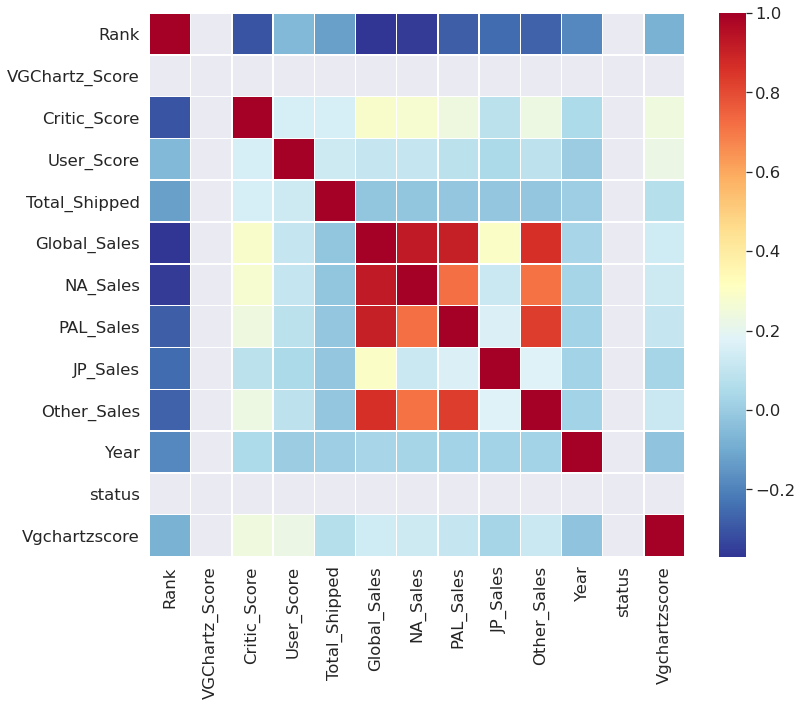

In [22]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5) 

### The heat map above shows that the strongest correlations are found in the sales column data, where we have more than 0.8 correlation. We can conclude that game sales in the analyzed regions are interdependent, with less influence from the Japanese market. Another important observation is in the "Rank" column, which has a lower correlation with the other columns. This column probably will not link much in the construction of some forecasting model.

### For exemple, the correlation between North America sales and global sales can see in the graph below

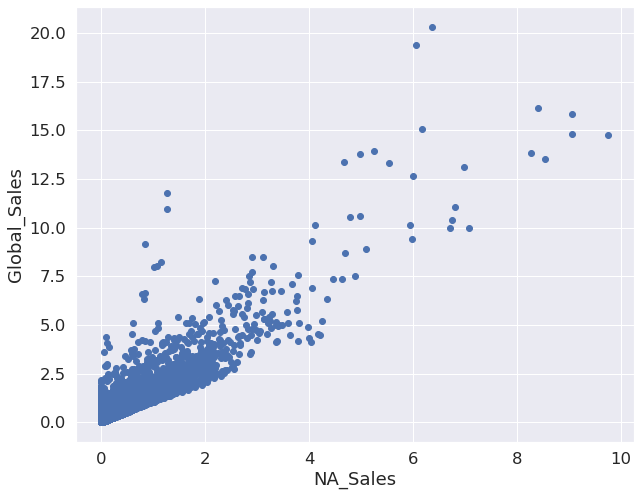

In [23]:
# The scatter graph of North America sales vs global sales 
plt.figure( figsize = (10, 8))
plt.scatter(df.NA_Sales, df.Global_Sales)
plt.xlabel('NA_Sales'),
plt.ylabel('Global_Sales'),
plt.show()

# 5. <a id='basic'> Loading machine learning algorithms 📊</a> 

### We will start the analysis with machine learning using a simple linear regression to create a forecast curve between the data in the global sales column with North America Sales. This is to test the quality of the data and the efficiency of our algorithms.

### Defining North America data as variable label x and global sales as target y and then fitting the variables into the linear regression model.

In [24]:
# Importing linear regression algorith
from sklearn.linear_model import LinearRegression

x = df.NA_Sales.values.reshape(-1,1)
y = df.Global_Sales.values.reshape(-1,1)

linear  = LinearRegression()
linear.fit(x, y)

LinearRegression()

In [25]:
# Linear regression score
x_ = np.arange(min(x), max(x), 0.1).reshape(-1,1)
predicted = linear.predict(x_)

from sklearn.metrics import r2_score
yhead = linear.predict(x)
print("r score: ", r2_score(y,yhead))

r score:  0.8499642223421757


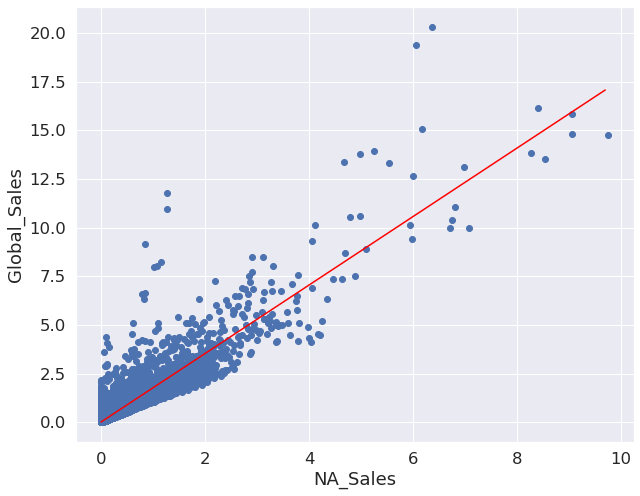

In [26]:
# Plotting forecasting line
plt.figure( figsize = (10,8))
plt.scatter(x, y)
plt.plot(x_, predicted, color = 'red')
plt.xlabel('NA_Sales'),
plt.ylabel('Global_Sales'),
plt.show()

### We see that our linear regression model fits well with the data, this is an indication that the data are well correlated. The chart implies that sales performance in North America strongly influences global sales.

# Using deep learning model for forecasting

### Although machine learning algorithms like linear regression perform well in many situations, they are quite limited when the data we use to make predictions is related to multiple targets. However, we can use more powerful methods, such as artificial neural networks that are based on deep learning algorithms. Then we will use the tensorflow library to build our neural networks that are suitable for a good performance of the forecasting model.

In [27]:
# Spreading the dataset into part training and testing part
train = dff.sample(frac=0.8,random_state=0)
test = dff.drop(train.index)

In [28]:
# Showing statistics
train_stats = train.describe()
train_stats.pop("Global_Sales")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Rank,44634.0,27892.801317,16090.847502,1.0,13965.25,27952.0,41789.75,55792.00
Name,44634.0,18612.490254,10738.348475,0.0,9212.00,18758.5,27972.75,37101.00
Genre,44634.0,9.338061,6.026346,0.0,5.00,10.0,15.00,19.00
Platform,44634.0,43.725075,16.875811,0.0,34.00,45.0,53.00,73.00
Publisher,44634.0,1595.048931,930.215142,0.0,758.00,1656.0,2475.00,3068.00
Critic_Score,44634.0,0.838802,2.366674,0.0,0.00,0.0,0.00,10.00
User_Score,44634.0,0.049594,0.645688,0.0,0.00,0.0,0.00,10.00
Total_Shipped,44634.0,0.062600,0.857748,0.0,0.00,0.0,0.00,82.86
NA_Sales,44634.0,0.063705,0.266539,0.0,0.00,0.0,0.00,9.07
PAL_Sales,44634.0,0.036658,0.203713,0.0,0.00,0.0,0.00,9.71


In [29]:
# We define the training and test target
Y_train = train.pop('Global_Sales')
Y_test = test.pop('Global_Sales')

### For our deep learning algorithm to work in a stable way we need to normalize the training and test dataset where the data should assume values ​​between 0 and 1.

In [30]:
# Normalizing data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train = norm(train)
normed_test = norm(test)

### Building the neural network with two internal layers with 64 neurons each.

In [31]:
# Building neural network
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [34]:
example_batch = normed_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.03506459],
       [ 0.25919312],
       [ 0.09599243],
       [ 0.13345142],
       [ 0.0829996 ],
       [ 0.22572127],
       [-0.08637789],
       [ 0.08066089],
       [-0.04593805],
       [ 0.11757516]], dtype=float32)

In [35]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.000013,0.001593,0.000013,0.000071,0.002646,0.000071,995
996,0.000013,0.001626,0.000013,0.000007,0.001256,0.000007,996
997,0.000013,0.001608,0.000013,0.000021,0.002084,0.000021,997
998,0.000014,0.001631,0.000014,0.000060,0.003270,0.000060,998
999,0.000014,0.001628,0.000014,0.000007,0.001285,0.000007,999


### The graphs below show us the evolution of training the model and the reduction of error in terms of epochs. We see that the evolution of the model happens very quickly to its optimum value.

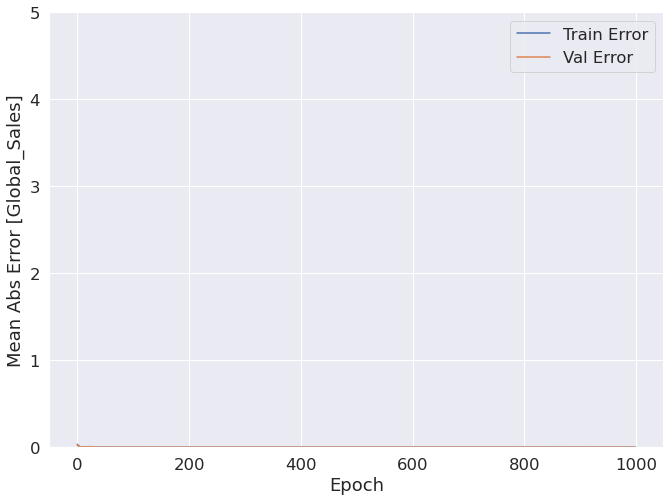

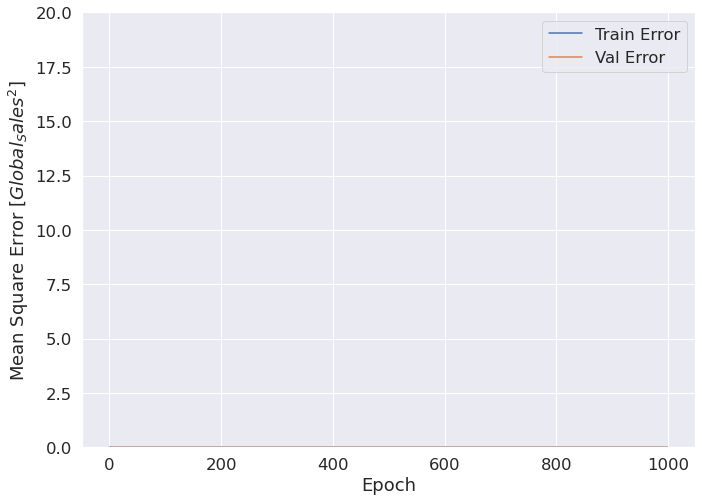

In [37]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Global_Sales]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Global_Sales^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


..........................................

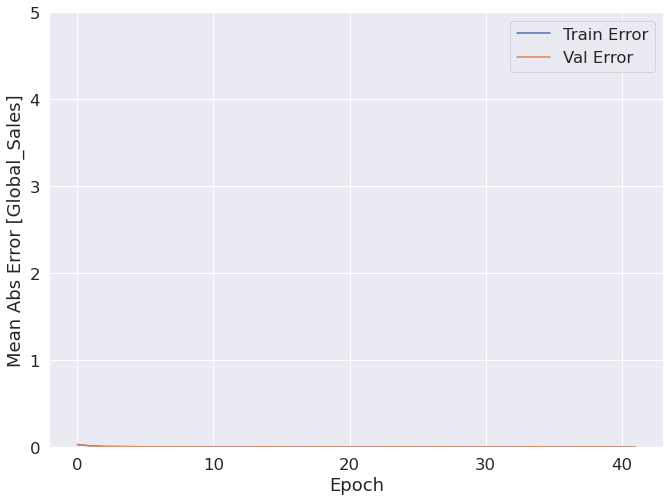

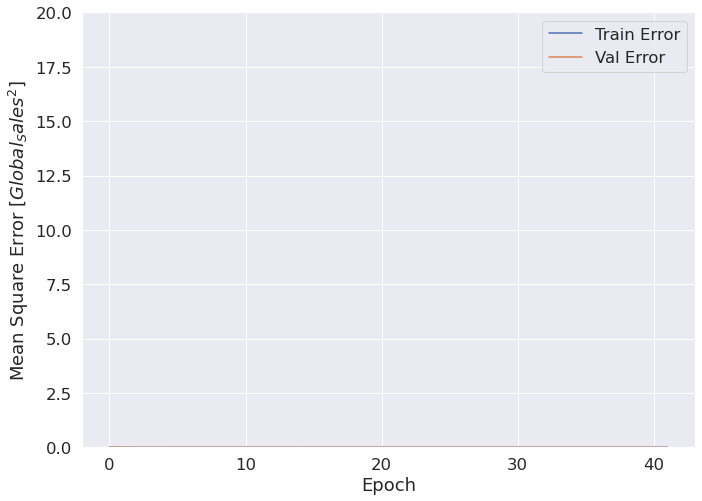

In [38]:
model = build_model()

# O paramêtro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train, Y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [39]:
loss, mae, mse = model.evaluate(normed_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Global_Sales".format(mae))

349/349 - 0s - loss: 3.4693e-05 - mae: 0.0022 - mse: 3.4693e-05
Testing set Mean Abs Error:  0.00 Global_Sales


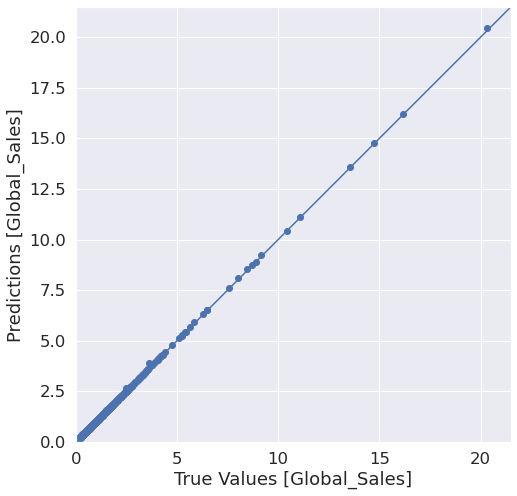

In [40]:
# Plotting the graph of the values predicted by the model in comparison to the real values
test_predictions = model.predict(normed_test).flatten()

plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [Global_Sales]')
plt.ylabel('Predictions [Global_Sales]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# 6. <a id='basic'> Conclusion </a> 

### Notably our prediction of the values of global gaming vandas represented by our line fits very well with the actual values. So the deep learning method works very well for our game dataset, however the forecasts made even with deep learning are rarely so good. Probably the great efficiency of our model is due to the fact that we have several sales columns strongly correlated. Naturally, the smaller the data correlations, the greater the divergence between the predicted and the actual values.